## olasılıksal dil modelleri
- dilin yapısı ve düzenini anlamak ve modellemek için kullanılan istatiksel yöntemlerdir
- olasılıksal dil modelleri
    - N-Gram Models
    - Hidden Markov Models
    - Maximum Entropy Models


### n-gram models
- bir dizideki, cümledeki arkadaşık kelime veya karakter gruplarının olasılıklarını tahmin eder.
- cümlede bir kelimeden sonra hangi olasılıkla hangi kelime geleceğini tahmin etme
- hesaplaması basit ve hızlıdır
- yerel bağlantıları iyi yakalar
- bağlam sınırlıdır, uzun mesafe bağımlılıkları yakalayamazlar
- n sayısı artıktça model yavaş çalışır
- yüksek veri kümesi gerektirir
- 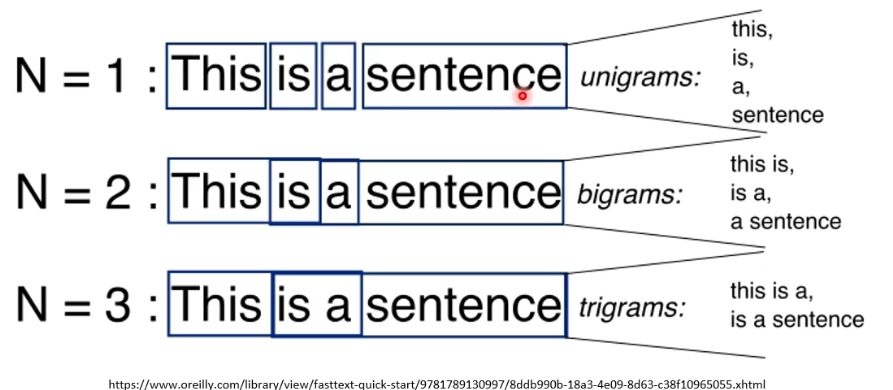



In [14]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

from collections import Counter

corpus = ["I love apple",
         "I love her",
         "I love NLP",
         "You love me",
         "They love apple",
         "I love you and you love me"]

tokens = [word_tokenize(sentence) for sentence in corpus]

bigrams = []
for token_list in tokens:
    bigrams.extend(list(ngrams(token_list,2)))

bigrams_freq = Counter(bigrams)
print(bigrams_freq)

trigrams = []
for token_list in tokens:
    trigrams.extend(list(ngrams(token_list,3)))

trigrams_freq = Counter(trigrams)
print(trigrams_freq)

bigram = ("I","love")
prob_you = trigrams_freq[("I","love","NLP")]/bigrams_freq[bigram]
print(prob_you)

Counter({('I', 'love'): 4, ('love', 'apple'): 2, ('love', 'me'): 2, ('love', 'her'): 1, ('love', 'NLP'): 1, ('You', 'love'): 1, ('They', 'love'): 1, ('love', 'you'): 1, ('you', 'and'): 1, ('and', 'you'): 1, ('you', 'love'): 1})
Counter({('I', 'love', 'apple'): 1, ('I', 'love', 'her'): 1, ('I', 'love', 'NLP'): 1, ('You', 'love', 'me'): 1, ('They', 'love', 'apple'): 1, ('I', 'love', 'you'): 1, ('love', 'you', 'and'): 1, ('you', 'and', 'you'): 1, ('and', 'you', 'love'): 1, ('you', 'love', 'me'): 1})
0.25


### hidden markov models
- bir dizi gözlemin arkasında gizli bir durum dizisinin(dilbilgisi vs.) olduğu varsayımına dayanır.
- her bir durumun belirli bir olasılıkla başka bir duruma geçeceğini ve her durumun belirli bir gözlemi üreteceğini varsayar.
- konuşma, kelime tanıma
- dil modelleme (dilbilgisi)
- part-of-speech
- bağlam modelleme mümkün
- verimli algoritmalar
- basitleştirici varsayımları => dezavantaj
- eğitim zorluğu => dezavantaj
- 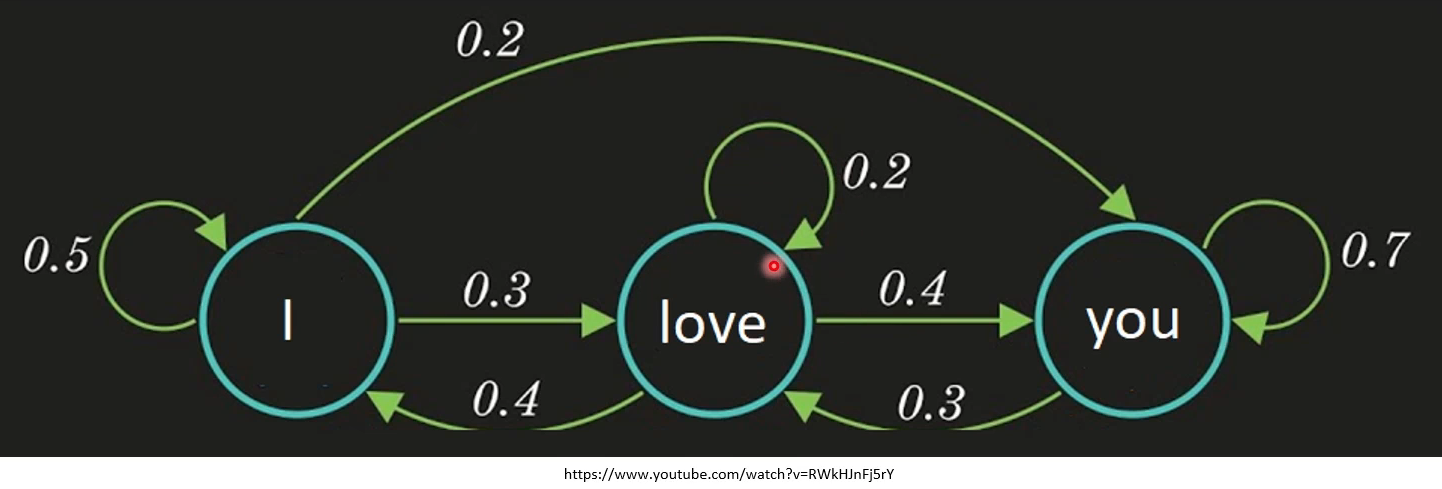


In [16]:
import nltk 
from nltk.tag import hmm

train_data = [[("I","PRP"),("am","VBP"),("a","DT"),("teacher","NN")]
              ,[("You","PRP"),("are","VBP"),("a","DT"),("student","NN")]]

trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_data)

test_sentence = "I am a student".split()

tags = hmm_tagger.tag(test_sentence)

print(f"yeni cümle {tags}")




yeni cümle [('I', 'PRP'), ('am', 'VBP'), ('a', 'DT'), ('student', 'NN')]


### maximum entropy models
- olasılık dağılımında mümkün olduğunca az varsayımda bulunur.
- eldeki veriler kadar ön yargılıdır
- sınıflandırma kullanılır (sentiment analysis)
- esnektir
- iyi genelleme
- hesaplama maliyeti yüksek
- özellik mühendisliği çok önemlidir
- 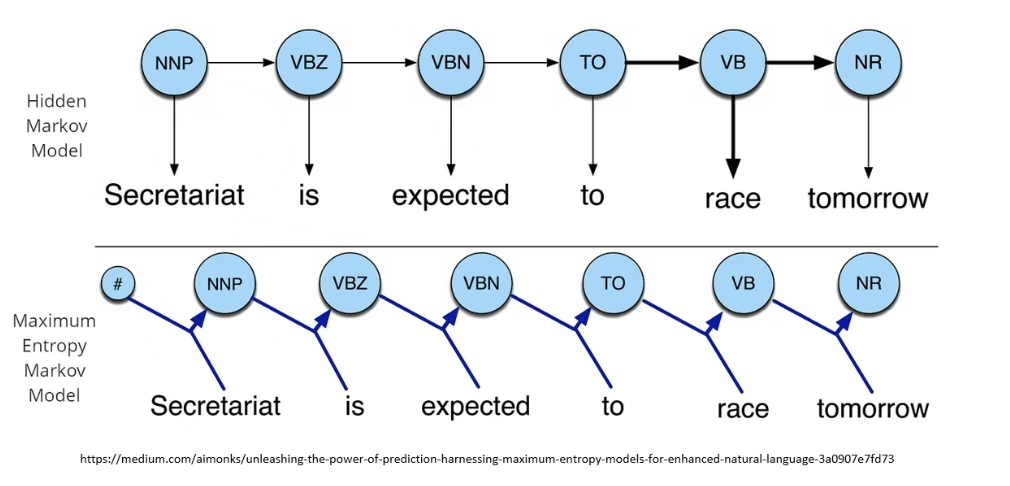


In [21]:
from nltk.classify import MaxentClassifier

train_data = [({"love":True,"amazing":True,"happy":True,"terrible":False},"positive"),
              ({"hate":True,"terrible":True},"negative"),
              ({"joy":True,"happy":True,"hate":False},"positive"),
              ({"sad":True,"depressed":True,"love":False},"negative")]

classifier = MaxentClassifier.train(train_data,max_iter=10)

test_sentence = "I hate this movie"
features = {word : (word in test_sentence.lower().split()) for word in ["love","amazing","happy","terrible","hate","joy","happy","sad","depressed"]}

label = classifier.classify(features)
print(f"result: {label}")

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.500
             2          -0.40641        1.000
             3          -0.28861        1.000
             4          -0.22397        1.000
             5          -0.18304        1.000
             6          -0.15479        1.000
             7          -0.13410        1.000
             8          -0.11829        1.000
             9          -0.10582        1.000
         Final          -0.09573        1.000
result: negative
